#Libraries

In [21]:
import numpy as np

# Needed for plotting
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Needed for generating classification, regression and clustering datasets
import sklearn.datasets as dt

# Needed for generating data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

#Code


In [22]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

<ipython-input-22-5afc1ec98ee1>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('RdYlBu')


In [23]:
rand = np.random.RandomState(seed)

dist_list = ['uniform','normal','exponential','lognormal','chisquare','beta']
param_list = ['-1,1','0,1','1','0,1','2','0.5,0.9']
colors_list = ['green','blue','yellow','cyan','magenta','pink']

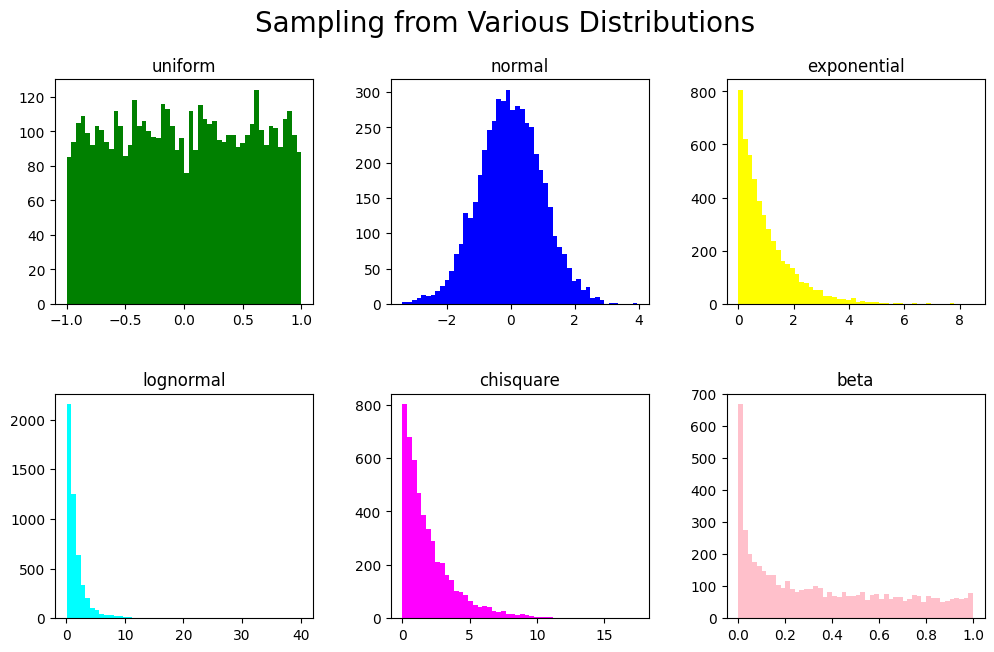

In [24]:
fig,ax = plt.subplots(nrows=2, ncols=3,figsize=(12,7))
plt_ind_list = np.arange(6)+231

for dist, plt_ind, param, colors in zip(dist_list, plt_ind_list, param_list, colors_list):
    x = eval('rand.'+dist+'('+param+',5000)')

    plt.subplot(plt_ind)
    plt.hist(x,bins=50,color=colors)
    plt.title(dist)

fig.subplots_adjust(hspace=0.4,wspace=.3)
plt.suptitle('Sampling from Various Distributions',fontsize=20)
plt.show()

<ipython-input-25-480931fd1fcb>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  map_colors = plt.cm.get_cmap('RdYlBu')


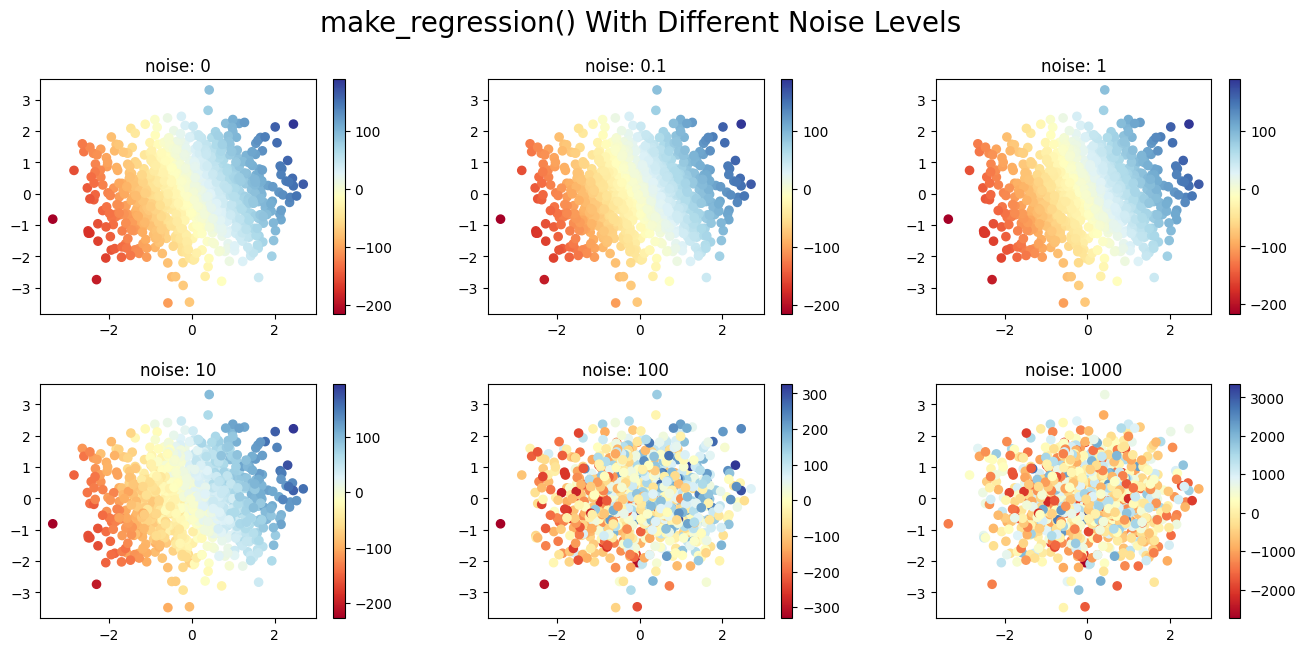

In [25]:
map_colors = plt.cm.get_cmap('RdYlBu')
fig,ax = plt.subplots(nrows=2, ncols=3,figsize=(16,7))
plt_ind_list = np.arange(6)+231

for noise,plt_ind in zip([0,0.1,1,10,100,1000],plt_ind_list):
    x,y = dt.make_regression(n_samples=1000,
                             n_features=2,
                             noise=noise,
                             random_state=rand_state)

    plt.subplot(plt_ind)
    my_scatter_plot = plt.scatter(x[:,0],
                                  x[:,1],
                                  c=y,
                                  vmin=min(y),
                                  vmax=max(y),
                                  s=35,
                                  cmap=color_map)

    plt.title('noise: '+str(noise))
    plt.colorbar(my_scatter_plot)

fig.subplots_adjust(hspace=0.3,wspace=.3)
plt.suptitle('make_regression() With Different Noise Levels',fontsize=20)
plt.show()

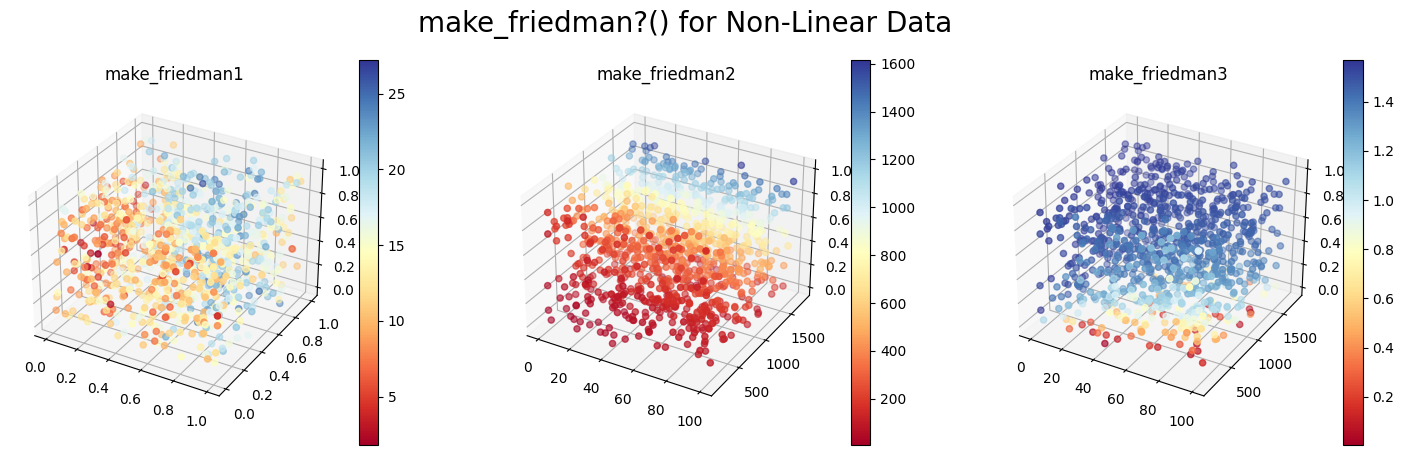

In [26]:
fig = plt.figure(figsize=(18,5))

x,y = dt.make_friedman1(n_samples=1000,n_features=5,random_state=rand_state)
ax = fig.add_subplot(131, projection='3d')
my_scatter_plot = ax.scatter(x[:,0], x[:,1],x[:,2], c=y, cmap=color_map)
fig.colorbar(my_scatter_plot)
plt.title('make_friedman1')

x,y = dt.make_friedman2(n_samples=1000,random_state=rand_state)
ax = fig.add_subplot(132, projection='3d')
my_scatter_plot = ax.scatter(x[:,0], x[:,1],x[:,2], c=y, cmap=color_map)
fig.colorbar(my_scatter_plot)
plt.title('make_friedman2')

x,y = dt.make_friedman3(n_samples=1000,random_state=rand_state)
ax = fig.add_subplot(133, projection='3d')
my_scatter_plot = ax.scatter(x[:,0], x[:,1],x[:,2], c=y, cmap=color_map)
fig.colorbar(my_scatter_plot)
plt.suptitle('make_friedman?() for Non-Linear Data',fontsize=20)
plt.title('make_friedman3')

plt.show()

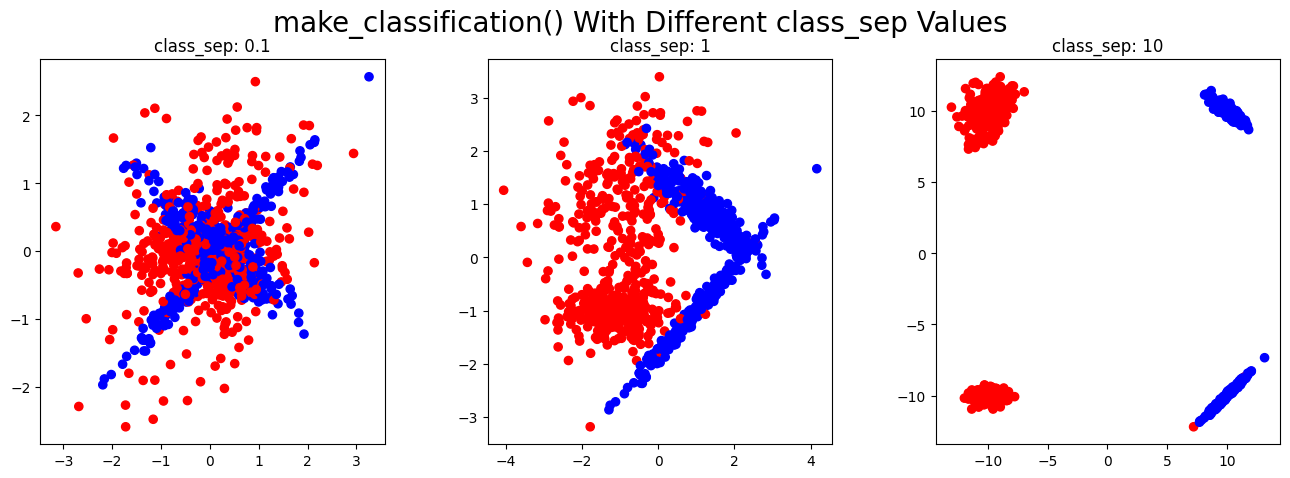

In [27]:
fig,ax = plt.subplots(nrows=1, ncols=3,figsize=(16,5))
plt_ind_list = np.arange(3)+131

for class_sep,plt_ind in zip([0.1,1,10],plt_ind_list):
    x,y = dt.make_classification(n_samples=1000,
                                 n_features=2,
                                 n_repeated=0,
                                 class_sep=class_sep,
                                 n_redundant=0,
                                 random_state=rand_state)

    plt.subplot(plt_ind)
    my_scatter_plot = plt.scatter(x[:,0],
                                  x[:,1],
                                  c=y,
                                  vmin=min(y),
                                  vmax=max(y),
                                  s=35,
                                  cmap=color_map_discrete)
    plt.title('class_sep: '+str(class_sep))

fig.subplots_adjust(hspace=0.3,wspace=.3)
plt.suptitle('make_classification() With Different class_sep Values',fontsize=20)
plt.show()

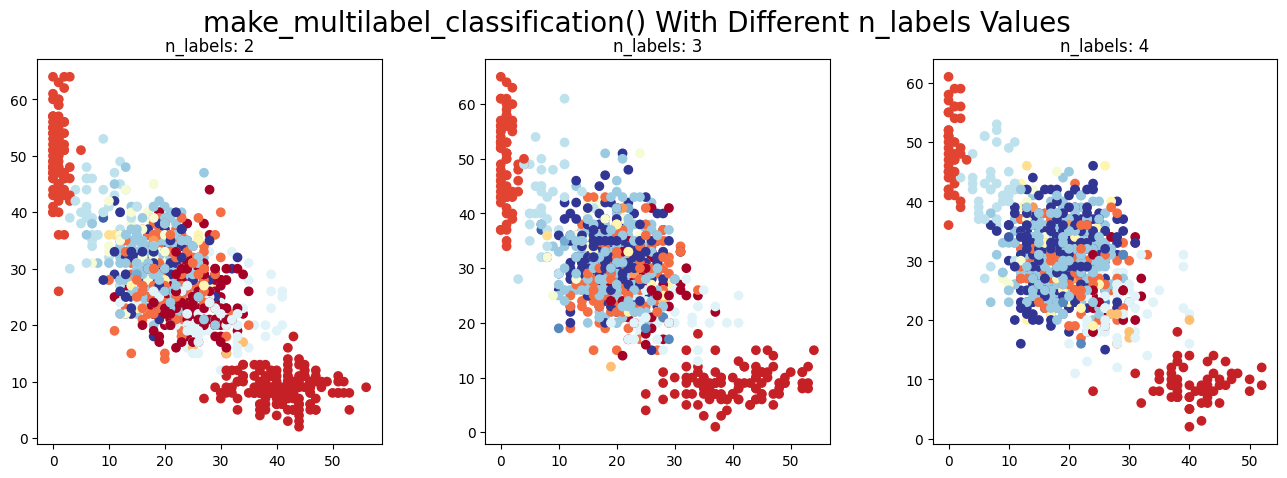

In [28]:
fig,ax = plt.subplots(nrows=1, ncols=3,figsize=(16,5))
plt_ind_list = np.arange(3)+131

for label,plt_ind in zip([2,3,4],plt_ind_list):
    x,y = dt.make_multilabel_classification(n_samples=1000,
                                            n_features=2,
                                            n_labels=label,
                                            n_classes=4,
                                            random_state=rand_state)
    target = np.sum(y*[8,4,2,1],axis=1)

    plt.subplot(plt_ind)
    my_scatter_plot = plt.scatter(x[:,0],
                                  x[:,1],
                                  c=target,
                                  vmin=min(target),
                                  vmax=max(target),
                                  cmap=color_map)
    plt.title('n_labels: '+str(label))

fig.subplots_adjust(hspace=0.3,wspace=.3)
plt.suptitle('make_multilabel_classification() With Different n_labels Values',fontsize=20)
plt.show()

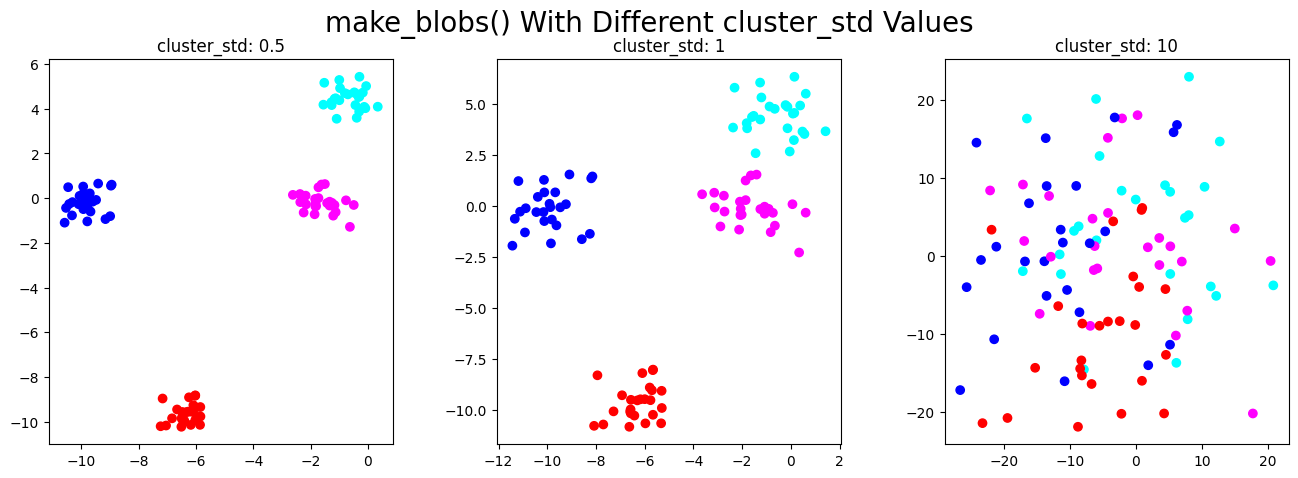

In [29]:
fig,ax = plt.subplots(nrows=1, ncols=3,figsize=(16,5))
plt_ind_list = np.arange(3)+131

for std,plt_ind in zip([0.5,1,10],plt_ind_list):
    x, label = dt.make_blobs(n_features=2,
                             centers=4,
                             cluster_std=std,
                             random_state=rand_state)

    plt.subplot(plt_ind)
    my_scatter_plot = plt.scatter(x[:,0],
                                  x[:,1],
                                  c=label,
                                  vmin=min(label),
                                  vmax=max(label),
                                  cmap=color_map_discrete)
    plt.title('cluster_std: '+str(std))

fig.subplots_adjust(hspace=0.3,wspace=.3)
plt.suptitle('make_blobs() With Different cluster_std Values',fontsize=20)
plt.show()

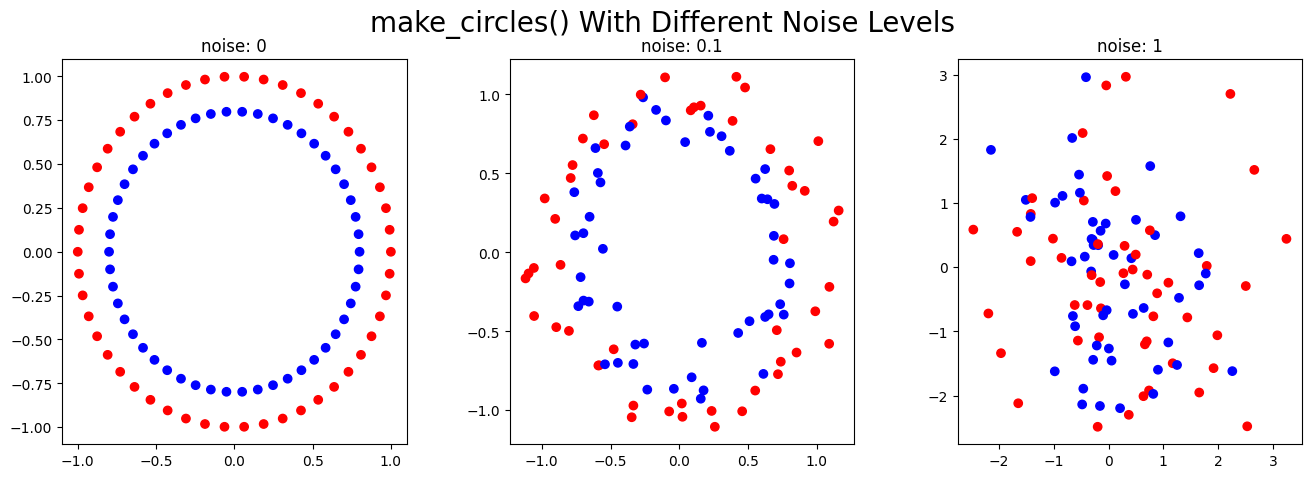

In [30]:
fig,ax = plt.subplots(nrows=1, ncols=3,figsize=(16,5))
plt_ind_list = np.arange(3)+131

for noise,plt_ind in zip([0,0.1,1],plt_ind_list):
    x, label = dt.make_circles(noise=noise,random_state=rand_state)

    plt.subplot(plt_ind)
    my_scatter_plot = plt.scatter(x[:,0],
                                  x[:,1],
                                  c=label,
                                  vmin=min(label),
                                  vmax=max(label),
                                  cmap=color_map_discrete)
    plt.title('noise: '+str(noise))

fig.subplots_adjust(hspace=0.3,wspace=.3)
plt.suptitle('make_circles() With Different Noise Levels',fontsize=20)
plt.show()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


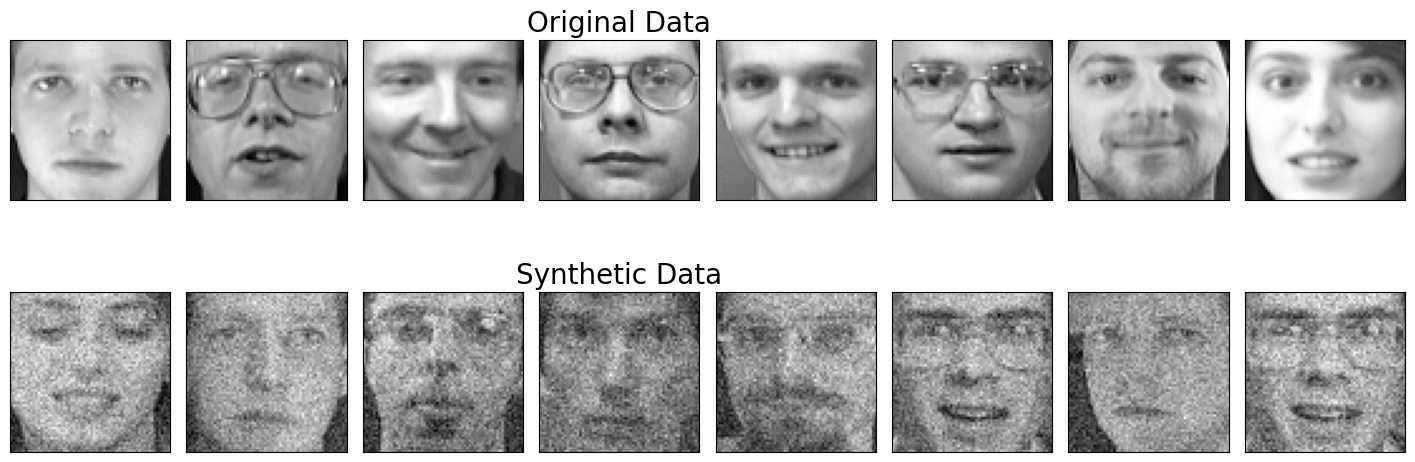

In [31]:
# Fetch the dataset and store in X
faces = dt.fetch_olivetti_faces()
X = faces.data

# Fit a kernel density model using GridSearchCV to determine the best parameter for bandwidth
bandwidth_params = {'bandwidth': np.arange(0.01,1,0.05)}
grid_search = GridSearchCV(KernelDensity(), bandwidth_params)
grid_search.fit(X)
kde = grid_search.best_estimator_

# Generate/sample 8 new faces from this dataset
new_faces = kde.sample(8, random_state=rand_state)

# Show a sample of 8 original face images and 8 generated faces derived from the faces dataset
fig,ax = plt.subplots(nrows=2, ncols=8,figsize=(18,6),subplot_kw=dict(xticks=[], yticks=[]))
for i in np.arange(8):
    ax[0,i].imshow(X[10*i,:].reshape(64,64),cmap=plt.cm.gray)
    ax[1,i].imshow(new_faces[i,:].reshape(64,64),cmap=plt.cm.gray)
ax[0,3].set_title('Original Data',fontsize=20)
ax[1,3].set_title('Synthetic Data',fontsize=20)
fig.subplots_adjust(wspace=.1)
plt.show()